In [1]:
from importlib.machinery import SourceFileLoader

In [2]:
import torch
from model.vitdet import ViTDet

In [3]:
training_config_loader = SourceFileLoader("training_config", "model/config/dataset/lvis.py").load_module()
model_config_loader = SourceFileLoader("model_config", "model/config/model/eva02_L.py").load_module()

In [4]:
train_config = training_config_loader.get_train_config()
model_config = model_config_loader.get_model_config(train_config)

In [5]:
model = ViTDet(**model_config)
model.load_state_dict(torch.load("weights/eva02_L_lvis_sys_o365.pth")["model"])

Skipping key: proposal_generator.anchor_generator.cell_anchors.0
Skipping key: proposal_generator.anchor_generator.cell_anchors.1
Skipping key: proposal_generator.anchor_generator.cell_anchors.2
Skipping key: proposal_generator.anchor_generator.cell_anchors.3
Skipping key: proposal_generator.anchor_generator.cell_anchors.4
Skipping key: roi_heads.box_predictor.0.fed_loss_cls_weights
Skipping key: roi_heads.box_predictor.1.fed_loss_cls_weights
Skipping key: roi_heads.box_predictor.2.fed_loss_cls_weights


In [6]:
from torchvision.io import read_image
from torchvision.transforms import functional as tvF
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
img_size = model_config["backbone_config"]["vit_config"]["img_size"]
test_img = read_image("/media/nas2/misl_image_db/Canon EOS SL1/1/test_007.jpg").float()
test_img = tvF.resize(test_img, (img_size, img_size))

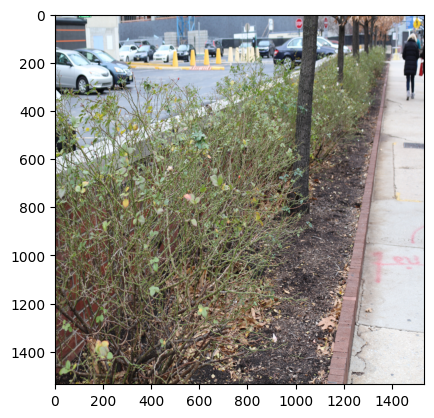

In [8]:
plt.imshow(test_img.permute(1, 2, 0).int())

In [9]:
device = "cuda"
model = model.eval().to(device)

In [10]:
tmp_x = [
    {"image": test_img.to(device)},
]

In [11]:
with torch.no_grad():
    y = model(tmp_x)
    y = y[0].to("cpu")

/home/tai/1-workdir/19-eva-02/.venv/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


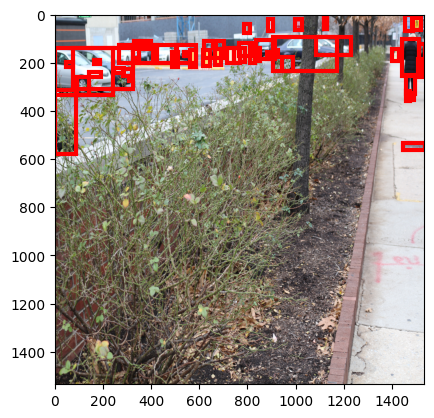

In [12]:
plt.imshow(test_img.permute(1, 2, 0).int())
for box in y.pred_boxes[0:50]:
    plt.gca().add_patch(patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=3, edgecolor="r", facecolor="none"))